This is a guide to do implement SVM Classifier in Python 3.

In [4]:
# Import the necessary Python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from time import time
from sklearn import metrics,datasets
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
# Import the data set



# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)
#dataset = datasets.load_iris()

In [3]:
# Check the top 5 records

dataset.head(5)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Split the dataset into Training and Validation

array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [8]:
from sklearn.svm import LinearSVC
t0 = time()

linClf = LinearSVC(C=1)
# loss="hinge"
linClf.fit(X_train, Y_train)

print("Training time:", round(time()-t0, 3), "s")
t1 = time()

pred = linClf.predict(X_validation)

print("Prediction time:", round(time()-t1, 3), "s")

accuracy = accuracy_score(Y_validation, pred)
print(accuracy)

Training time: 0.009 s
Prediction time: 0.0 s
0.8


/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [42]:
# Build the model
# it is slow 
from sklearn.svm import SVC
clf = SVC(kernel="linear",C=1)
t0 = time()
clf.fit(X_train, Y_train)
print("Training time:", round(time()-t0, 3), "s")
t1 = time()
pred = clf.predict(X_validation)
print("Prediction time:", round(time()-t1, 3), "s")
accuracy = accuracy_score(Y_validation, pred)
print(accuracy)

Training time: 0.001 s
Prediction time: 0.001 s
0.9666666666666667


In [43]:
clf.predict([[4.9, 2.5, 4.5, 1.7]])

array(['Iris-virginica'], dtype=object)

In [12]:
# Build the model

clf2 = SVC(kernel="poly",degree=3,C=0.001)
t0 = time()
clf2.fit(X_train, Y_train)
print("Training time:", round(time()-t0, 3), "s")
t1 = time()
pred = clf2.predict(X_validation)
print("Prediction time:", round(time()-t1, 3), "s")
accuracy = accuracy_score(Y_validation, pred)
print(accuracy)

Training time: 0.003 s
Prediction time: 0.001 s
0.8666666666666667


/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [14]:
# Build the model

clf3 = SVC(kernel="rbf",gamma=5,C=.1)
t0 = time()
clf3.fit(X_train, Y_train)
print("Training time:", round(time()-t0, 3), "s")
t1 = time()
pred = clf3.predict(X_validation)
print("Prediction time:", round(time()-t1, 3), "s")
accuracy = accuracy_score(Y_validation, pred)
print(accuracy)

Training time: 0.003 s
Prediction time: 0.001 s
0.8


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(X[:, 0], X[:, 1], c=y, s=100 * sample_weight, alpha=0.9,
                 cmap=plt.cm.bone, edgecolors='black')

    axis.axis('off')
    axis.set_title(title)



In [53]:

# we create 20 points
np.random.seed(0)

X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10

sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))

# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

print(sample_weight_last_ten)

[1.04855297 1.42001794 1.70627019 1.9507754  0.50965218 0.4380743
 1.25279536 0.77749036 1.61389785 3.1911042  0.89546656 0.3869025
 0.51080514 1.18063218 0.02818223 2.14165935 0.33258611 1.51235949
 3.17161047 1.81370583]


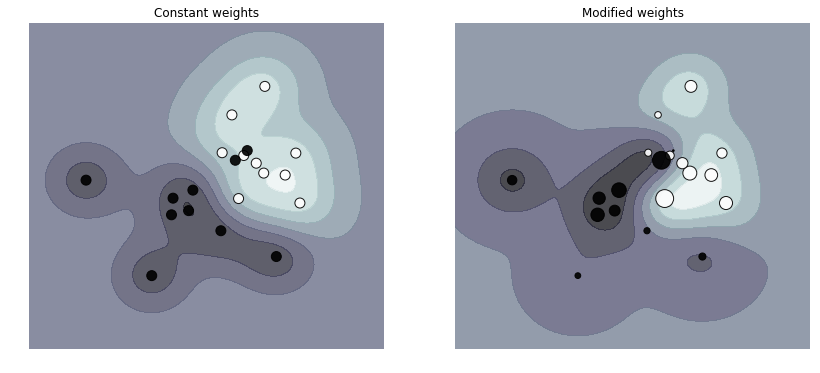

In [48]:


# for reference, first fit without sample weights

# fit the model
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(clf_no_weights, sample_weight_constant, axes[0],
                       "Constant weights")
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1],
                       "Modified weights")

plt.show()

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [50]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [51]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))

models = (clf.fit(X, y) for clf in models)



/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


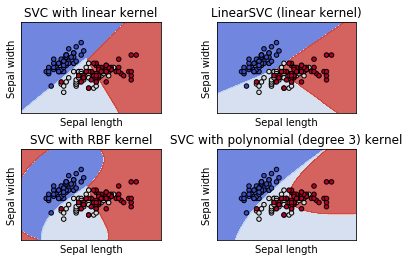

In [52]:
# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Unbalanced problems

In problems where it is desired to give more importance to certain classes or certain individual samples keywords class_weight 
and sample_weight can be used.

# Outlier Detection using OneClassSVM

Inliers are labeled 1, while outliers are labeled -1.

<OL>

<LI> <B>Outlier detection:</B>
 	The training data contains outliers which are defined as observations that are far from the others. Outlier detection estimators thus try to fit the regions where the training data is the most concentrated, ignoring the deviant observations.
<LI> <B>Novelty detection:</B>
 	The training data is not polluted by outliers and we are interested in detecting whether a new observation is an outlier. In this context an outlier is also called a novelty.

</Ol>

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

X_train.shape

(200, 2)

In [61]:
X_outliers.shape

(20, 2)

In [59]:
print(X_train)

[[ 1.79826187  1.89213405]
 [ 1.75605612  1.48211522]
 [ 2.05322784  1.87946572]
 [ 1.5109405   2.13883468]
 [ 1.72781049  2.01558362]
 [ 2.21872717  2.03869487]
 [ 2.34182021  1.62955225]
 [ 2.12070249  1.79455697]
 [ 1.73876086  1.8263451 ]
 [ 1.90653424  2.0168496 ]
 [ 1.65045505  2.27024795]
 [ 2.13969873  1.53912689]
 [ 2.44647566  2.56876675]
 [ 2.35363387  1.94602255]
 [ 1.67877421  2.31633552]
 [ 1.87904692  2.36673352]
 [ 2.06248249  2.29299171]
 [ 2.10690992  2.21197195]
 [ 2.00315001  2.53576115]
 [ 2.03807363  2.12059681]
 [ 2.56494521  1.59567228]
 [ 1.6188545   2.29081901]
 [ 1.64806298  2.58308636]
 [ 1.87591431  1.77576356]
 [ 2.57688261  2.44415444]
 [ 2.56026769  2.2718134 ]
 [ 1.74163229  2.57301949]
 [ 1.91959899  2.24073692]
 [ 2.28417559  1.95349697]
 [ 2.18422381  2.276662  ]
 [ 2.11292766  1.67017976]
 [ 2.08947145  2.39791577]
 [ 1.79162964  1.95510964]
 [ 1.86945393  2.55477912]
 [ 2.20168843  2.12223855]
 [ 1.76902518  2.16177476]
 [ 1.7977002   2.00954917]
 

In [56]:
# fit the model

clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)

clf.fit(X_train)

y_pred_train = clf.predict(X_train)

y_pred_test = clf.predict(X_test)

y_pred_outliers = clf.predict(X_outliers)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size



In [57]:
print(y_pred_outliers)

[-1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1]


In [58]:
print(y_pred_train)

[ 1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1 -1]


In [65]:
y_pred_train = clf.fit_predict(X_train)



In [66]:
print(y_pred_train)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1 -1  1  1  1 -1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1
  1  1  1  1  1  1  1 -1]


In [ ]:
GridSearch/RandomSearch

Class wt / Sample wt -- Done
Feature Engineering  -- ------
  Outlier detection  -- Done
  SMOTE              -- Code done , presentation to create
AWS setup of Deep    -- ------
Learning

Model saving         -- Done


# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

In [7]:
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
X.shape

(20, 2)

In [8]:
print(X)

[[ 0.81103085  0.54162418]
 [ 0.20064942 -0.02828967]
 [ 0.74796976  0.60898746]
 [ 0.77803461  0.85917707]
 [ 0.35831908  1.96313195]
 [ 2.98487459  0.77843668]
 [ 1.23053943  0.99093594]
 [ 1.02452358  0.7444717 ]
 [ 0.30323931  2.53557724]
 [-0.15939783  1.78216575]
 [-0.76083068  1.26891416]
 [ 0.22240426 -2.44246163]
 [-0.04340513 -0.60825352]
 [ 0.58734952 -0.9186073 ]
 [-0.09703165  1.12131638]
 [ 0.71634238  1.33204951]
 [ 1.0267542   1.24173815]
 [ 1.01692235  2.22697301]
 [-0.10615346 -0.89438056]
 [-0.85874839  0.279133  ]]


In [9]:
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
print(sample_weight_last_ten)

[0.83756745 0.67764996 1.39645994 2.66770932 1.04153224 0.10990072
 0.0451113  0.96312583 1.82835309 1.43508138 0.84367012 0.69982717
 0.59673651 0.55209912 1.65765064 1.19170088 0.81817857 1.78038887
 0.71784811 1.35445322]


In [10]:
print(sample_weight_constant)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [11]:
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

In [12]:
print(sample_weight_last_ten)

[ 0.83756745  0.67764996  1.39645994  2.66770932  1.04153224  0.10990072
  0.0451113   0.96312583  1.82835309 21.52622066  0.84367012  0.69982717
  0.59673651  0.55209912  1.65765064  5.95850439  4.09089287  8.90194435
  3.58924056  6.77226611]
